<a href="https://colab.research.google.com/github/Ida-code/Machine-Learning-and-Deep-Learning-Projects/blob/main/Copy_of_skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Data Preprocessing (Original work by [Collaborator's Name](https://github.com/Princess-pooja25))
The cells containing the data loading and initial preprocessing steps developed by [Princess-pooja25].


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gdown

In [ ]:
!gdown --id 1GtxPnbFuo0QESsD6gx8s11KJid7iit_B

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GtxPnbFuo0QESsD6gx8s11KJid7iit_B
From (redirected): https://drive.google.com/uc?id=1GtxPnbFuo0QESsD6gx8s11KJid7iit_B&confirm=t&uuid=ad0245e2-9fa3-4a7e-88d4-44e0a1644d1a
To: /content/ISIC_Melanoma_Data.zip
100% 117M/117M [00:02<00:00, 39.8MB/s]


In [ ]:
#Dont run this if already run
!unzip ISIC_Melanoma_Data.zip

Archive:  ISIC_Melanoma_Data.zip
  inflating: ISIC_Melanoma_Data/malignant/998.jpg  
  inflating: ISIC_Melanoma_Data/malignant/961.jpg  
  inflating: ISIC_Melanoma_Data/malignant/980.jpg  
  inflating: ISIC_Melanoma_Data/malignant/962.jpg  
  inflating: ISIC_Melanoma_Data/malignant/987.jpg  
  inflating: ISIC_Melanoma_Data/malignant/968.jpg  
  inflating: ISIC_Melanoma_Data/malignant/970.jpg  
  inflating: ISIC_Melanoma_Data/malignant/969.jpg  
  inflating: ISIC_Melanoma_Data/malignant/967.jpg  
  inflating: ISIC_Melanoma_Data/malignant/991.jpg  
  inflating: ISIC_Melanoma_Data/malignant/977.jpg  
  inflating: ISIC_Melanoma_Data/malignant/999.jpg  
  inflating: ISIC_Melanoma_Data/malignant/974.jpg  
  inflating: ISIC_Melanoma_Data/malignant/983.jpg  
  inflating: ISIC_Melanoma_Data/malignant/990.jpg  
  inflating: ISIC_Melanoma_Data/malignant/960.jpg  
  inflating: ISIC_Melanoma_Data/malignant/929.jpg  
  inflating: ISIC_Melanoma_Data/malignant/973.jpg  
  inflating: ISIC_Melanoma_Data

In [ ]:
!pwd


/content


In [ ]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   44G   69G  39% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  748M  63% /usr/sbin/docker-init
tmpfs           6.4G  152K  6.4G   1% /var/colab
/dev/sda1        74G   49G   26G  66% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           113G   48G   66G  42% /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

In [ ]:
!ls /content
!ls /content/drive
!ls /content/drive/MyDrive


drive  ISIC_Melanoma_Data  ISIC_Melanoma_Data.zip  sample_data
MyDrive  Shareddrives
ISIC_Melanoma_Data.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content
!ls /content/drive
!ls /content/drive/MyDrive

drive  ISIC_Melanoma_Data  ISIC_Melanoma_Data.zip  sample_data
MyDrive  Shareddrives
ISIC_Melanoma_Data.zip


In [ ]:
!ls '/content/drive/MyDrive'


 breast_cancer_survival_stage_3000.csv.xlsx   ISIC_Melanoma_Data       train
'Colab Notebooks'			      ISIC_Melanoma_Data.zip   val
 integrated1_breast_cancer_data.csv	      My_project
 integrated_breast_cancer_data.csv	      traffic_project


In [ ]:
!unzip "/content/drive/MyDrive/ISIC_Melanoma_Data.zip" -d "/content/drive/MyDrive/"


Archive:  /content/drive/MyDrive/ISIC_Melanoma_Data.zip
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1000.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1001.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1002.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1004.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1005.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1007.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1008.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1009.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1010.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1011.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1012.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1014.jpg  
  inflating: /content/drive/MyDrive/ISIC_Melanoma_Data/benign/1015.j

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [ ]:
import os, shutil, random

base_dir = "/content/drive/MyDrive/ISIC_Melanoma_Data"  # current folder
classes = ["benign", "malignant"]  # change if your class folder names differ

train_base = "/content/drive/MyDrive/train"
val_base   = "/content/drive/MyDrive/val"

os.makedirs(train_base, exist_ok=True)
os.makedirs(val_base, exist_ok=True)


In [ ]:
split_ratio = 0.8  # 80% train, 20% val

for cls in classes:
    src_dir = os.path.join(base_dir, cls)
    train_dir = os.path.join(train_base, cls)
    val_dir = os.path.join(val_base, cls)

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    files = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]
    random.shuffle(files)

    split_idx = int(len(files) * split_ratio)
    train_files = files[:split_idx]
    val_files = files[split_idx:]

    for f in train_files:
        shutil.move(os.path.join(src_dir, f), os.path.join(train_dir, f))

    for f in val_files:
        shutil.move(os.path.join(src_dir, f), os.path.join(val_dir, f))

    print(cls, "→ train:", len(train_files), "val:", len(val_files))


benign → train: 921 val: 231
malignant → train: 765 val: 192


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen   = ImageDataGenerator(preprocessing_function=preprocess_input)

train_dir = "/content/drive/MyDrive/train"
val_dir   = "/content/drive/MyDrive/val"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 1686 images belonging to 2 classes.
Found 423 images belonging to 2 classes.


In [ ]:
images, labels = next(train_generator)   # get one batch
print(images.shape)


(32, 224, 224, 3)


In [ ]:
import os

print("Train benign:", len(os.listdir("/content/drive/MyDrive/train/benign")))
print("Train malignant:", len(os.listdir("/content/drive/MyDrive/train/malignant")))

Train benign: 921
Train malignant: 765


Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torchvision import models
from torchsummary import summary
import wandb
import os

In [ ]:
config = {
    "epochs": 25,
    "batch_size": 64,
    "learning_rate": 0.0001,
    "architecture": "MobileNet",
    "pretrained": True,
    "input_size": 224
}

In [ ]:
# =======================
# STEP 1: Data Preparation
# =======================

# Transforms for training and validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

train_dir = "/content/drive/MyDrive/train"
val_dir = "/content/drive/MyDrive/val"

train_dataset = datasets.ImageFolder(root=train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=val_dir, transform=data_transforms['val'])

train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config['batch_size'])

In [ ]:
# ===========================
# STEP 2: Load Pretrained MobileNetV2
# ===========================
from torchvision.models import MobileNet_V2_Weights

# Load pretrained MobileNetV2
model = models.mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)

# Replace the final classifier layer for 2-class skin classification
model.classifier[1] = nn.Linear(model.last_channel, 2)

# Freeze all parameters except the final layer
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier[1].parameters():
    param.requires_grad = True

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
from collections import Counter

# train_dataset is your ImageFolder dataset
class_counts = Counter(train_dataset.targets)

print("Class counts:", class_counts)

# Optional: print class names with counts
for class_name, class_idx in train_dataset.class_to_idx.items():
    print(f"{class_name}: {class_counts[class_idx]} images")

Class counts: Counter({0: 921, 1: 765})
benign: 921 images
malignant: 765 images


In [ ]:
from collections import Counter

# train_dataset is your ImageFolder dataset
class_counts = Counter(val_dataset.targets)

print("Class counts:", class_counts)

# Optional: print class names with counts
for class_name, class_idx in val_dataset.class_to_idx.items():
    print(f"{class_name}: {class_counts[class_idx]} images")

Class counts: Counter({0: 231, 1: 192})
benign: 231 images
malignant: 192 images


Class weights: tensor([1.8306, 2.2039], device='cuda:0')


In [ ]:
# ===================
# STEP 3: Loss & Optimizer
# ===================

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_score):
        if self.best_score is None:
            self.best_score = val_score

        elif val_score < self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_score
            self.counter = 0

In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader,
                epochs=10, device="cuda"):

    early_stopping = EarlyStopping(patience=5, min_delta=0.001)

    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        model.train()
        train_correct = 0
        train_total = 0
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()
            train_total += labels.size(0)

        train_acc = train_correct / train_total
        train_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_loss = 0.0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total
        val_loss /= len(val_loader)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

        # 🔥 Early Stopping Check
        early_stopping(val_acc)

        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    return model, train_acc_history, val_acc_history, train_loss_history, val_loss_history

In [ ]:
model, train_acc_history, val_acc_history, train_loss_history, val_loss_history = train_model(
    model, criterion, optimizer, train_loader, val_loader,
    epochs=config['epochs'], device=device
)

Epoch [1/25] Train Acc: 0.6293, Val Acc: 0.6005
Epoch [2/25] Train Acc: 0.7040, Val Acc: 0.7045
Epoch [3/25] Train Acc: 0.7479, Val Acc: 0.7376
Epoch [4/25] Train Acc: 0.7663, Val Acc: 0.7470
Epoch [5/25] Train Acc: 0.7847, Val Acc: 0.7612
Epoch [6/25] Train Acc: 0.7883, Val Acc: 0.7660
Epoch [7/25] Train Acc: 0.8066, Val Acc: 0.7849
Epoch [8/25] Train Acc: 0.7983, Val Acc: 0.7825
Epoch [9/25] Train Acc: 0.8084, Val Acc: 0.7896
Epoch [10/25] Train Acc: 0.8090, Val Acc: 0.7872
Epoch [11/25] Train Acc: 0.8108, Val Acc: 0.7896
Epoch [12/25] Train Acc: 0.8167, Val Acc: 0.7991
Epoch [13/25] Train Acc: 0.8078, Val Acc: 0.7872
Epoch [14/25] Train Acc: 0.8120, Val Acc: 0.8038
Epoch [15/25] Train Acc: 0.8179, Val Acc: 0.7943
Epoch [16/25] Train Acc: 0.8298, Val Acc: 0.7991
Epoch [17/25] Train Acc: 0.8197, Val Acc: 0.8038
Epoch [18/25] Train Acc: 0.8197, Val Acc: 0.7991
Epoch [19/25] Train Acc: 0.8173, Val Acc: 0.7991
Early stopping triggered


In [ ]:
pip install matplotlib scikit-learn

In [ ]:
epochs = len(train_acc_history)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Acc: {train_acc_history[epoch]:.4f} | Val Acc: {val_acc_history[epoch]:.4f}")
    print(f"Train Loss: {train_loss_history[epoch]:.4f} | Val Loss: {val_loss_history[epoch]:.4f}")
    print("-" * 40)

Epoch 1/19
Train Acc: 0.6293 | Val Acc: 0.6005
Train Loss: 0.6565 | Val Loss: 0.6498
----------------------------------------
Epoch 2/19
Train Acc: 0.7040 | Val Acc: 0.7045
Train Loss: 0.6079 | Val Loss: 0.5979
----------------------------------------
Epoch 3/19
Train Acc: 0.7479 | Val Acc: 0.7376
Train Loss: 0.5678 | Val Loss: 0.5665
----------------------------------------
Epoch 4/19
Train Acc: 0.7663 | Val Acc: 0.7470
Train Loss: 0.5386 | Val Loss: 0.5388
----------------------------------------
Epoch 5/19
Train Acc: 0.7847 | Val Acc: 0.7612
Train Loss: 0.5177 | Val Loss: 0.5212
----------------------------------------
Epoch 6/19
Train Acc: 0.7883 | Val Acc: 0.7660
Train Loss: 0.5031 | Val Loss: 0.5031
----------------------------------------
Epoch 7/19
Train Acc: 0.8066 | Val Acc: 0.7849
Train Loss: 0.4767 | Val Loss: 0.4875
----------------------------------------
Epoch 8/19
Train Acc: 0.7983 | Val Acc: 0.7825
Train Loss: 0.4660 | Val Loss: 0.4778
---------------------------------

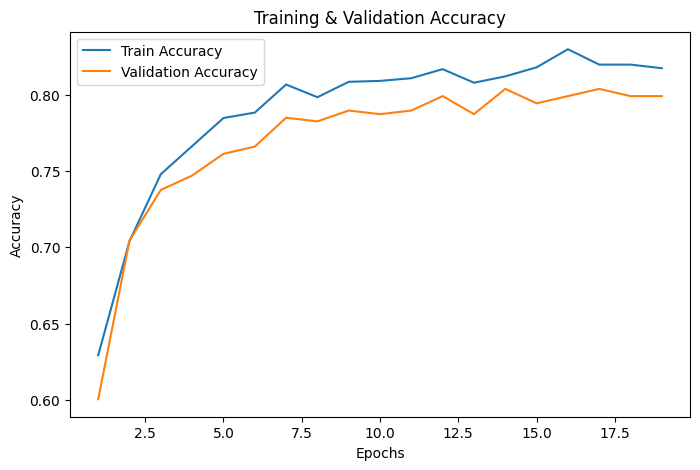

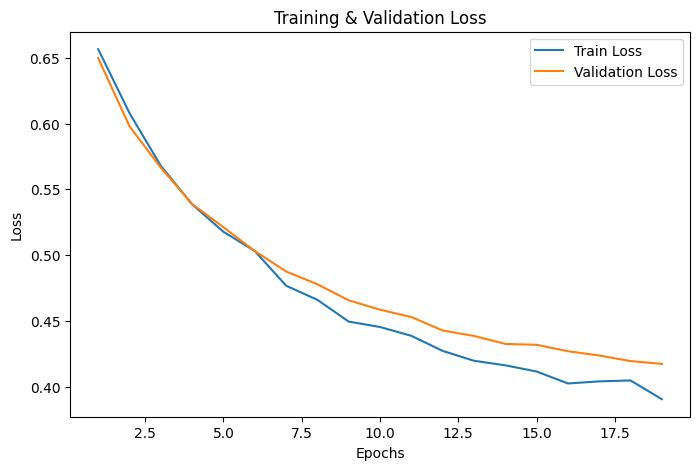

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

epochs = len(train_acc_history)

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_acc_history, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_loss_history, label='Train Loss')
plt.plot(range(1, epochs+1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

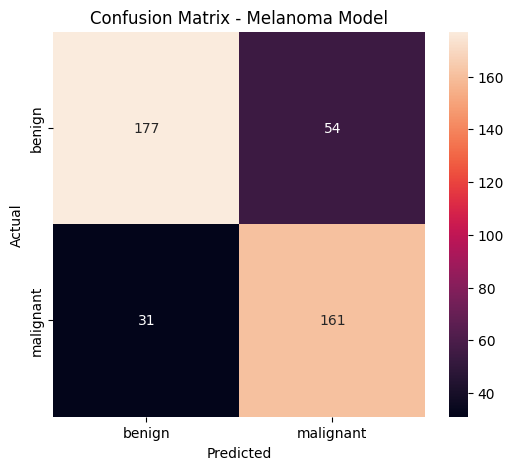

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Assuming model and device are defined from previous cells
# model = model # loaded from melanoma_model.pth
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval() # Set model to evaluation mode

y_true = []
y_pred = []

with torch.no_grad(): # Disable gradient calculation for inference
    for images, labels in val_loader: # Use val_loader as test data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get class names from the dataset
class_names = val_dataset.classes

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Melanoma Model") # Adjusted title
plt.show()

In [ ]:
print(train_loader.dataset.class_to_idx)

{'benign': 0, 'malignant': 1}


In [ ]:
# Save the entire model
torch.save(model, "melanoma_model.pth")

# OR save only the weights/state_dict (recommended)
torch.save(model.state_dict(), "melanoma_model_weights.pth")

In [ ]:
torch.save(model, "/content/drive/MyDrive/melanoma_model.pth")

In [ ]:
model = torch.load("/content/drive/MyDrive/melanoma_model.pth",
                   map_location=torch.device('cpu'), weights_only=False)
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load your trained model
model = torch.load("/content/drive/MyDrive/melanoma_model.pth", weights_only=False)
model = model.to(device) # Move model to the correct device
model.eval()  # set model to evaluation mode

# Class labels
class_names = ["benign", "malignant"]  # adjust if you have more classes

# Transform pipeline (adjust size/normalization to match your training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # MobileViT typical input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def predict_image(image_path):
    """
    Predicts melanoma from a single image using the trained MobileViT model.

    Args:
        image_path (str): Path to the image file.

    Returns:
        tuple: (predicted_label, confidence_score)
    """
    # Load image
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # add batch dimension
    image = image.to(device) # Move input image to the correct device

    # Prediction
    with torch.no_grad():
        outputs = model(image)
        probs = torch.softmax(outputs, dim=1)
        confidence, predicted_idx = torch.max(probs, 1)

    predicted_label = class_names[predicted_idx.item()]
    return predicted_label, confidence.item()


# Example usage
image_path = "/content/drive/MyDrive/val/malignant/345.jpg" # A sample image from the validation set
label, confidence = predict_image(image_path)
print(f"Prediction: {label} (Confidence: {confidence*100:.2f}%)")

Prediction: malignant (Confidence: 76.07%)
